In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [8]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential,load_model
from keras.layers.core import Dropout,Dense,Activation,Lambda,Flatten
from keras.utils import np_utils
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print(keras.__version__)

2.0.9


# MNIST using Neural network

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

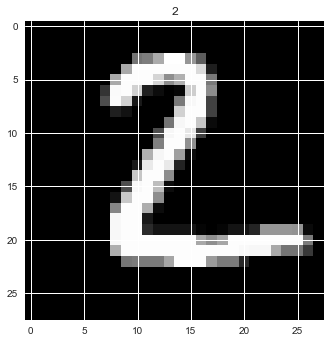

In [5]:
plt.imshow(x_test[1],cmap='gray')
plt.title(y_test[1])
plt.show()

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float')
x_test=x_test.astype('float')

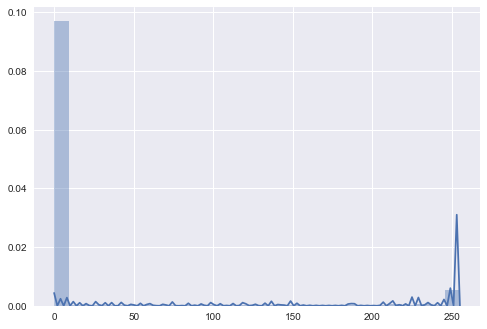

In [8]:
sns.distplot(x_train[23].reshape(784))
plt.show()

In [8]:
x_train /= 255
x_test /= 255

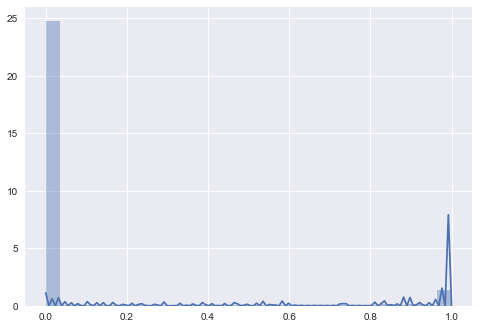

In [10]:
sns.distplot(x_train[23].reshape(784))
plt.show()

In [9]:
x_train.shape

(60000, 784)

In [10]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [17]:
model=Sequential()
#model.add(Dense(units=512,activation='relu',input_shape=784))
model.add(Dense(512, input_shape=(784,),activation='relu'))
model.add(Dense(512,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
#model.compile(optimizer='sgd',metrics='accuracy',loss='categorical_crossentropy')
model.compile(optimizer=keras.optimizers.sgd(lr=0.01, momentum=0.9, nesterov=True),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
model.fit(x_train,Y_train,epochs=2,batch_size=32)

Epoch 1/2
60000/60000 [==============================] - 14s 226us/step - loss: 0.2500 - acc: 0.9266
Epoch 2/2
60000/60000 [==============================] - 14s 230us/step - loss: 0.0984 - acc: 0.9699


In [18]:
model.fit(x_train,Y_train,epochs=2,batch_size=32,validation_data=(x_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 14s 238us/step - loss: 0.0643 - acc: 0.9805 - val_loss: 0.0872 - val_acc: 0.9721
Epoch 2/2
60000/60000 [==============================] - 15s 242us/step - loss: 0.0457 - acc: 0.9862 - val_loss: 0.0750 - val_acc: 0.9771


In [19]:
% ls -ltr

total 96
drwxr-xr-x  6 sandip  staff    192 Jan  2 20:43 MNIST_data/
-rw-r--r--@ 1 sandip  staff   2466 Jan  9 17:05 UpdateDetails.pdf
-rw-r--r--  1 sandip  staff  42788 Jan 17 11:11 MNIST.ipynb


In [20]:
%pwd

'/Users/sandip/Data/Kaggle/MNIST'

In [21]:
save_dir='/Users/sandip/Data/Kaggle/MNIST/model/'
model_name='mnist_simple.h5'
import os
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /Users/sandip/Data/Kaggle/MNIST/model/mnist_simple.h5 


In [22]:
loss_and_metrics=model.evaluate(x_test,Y_test,batch_size=200)

10000/10000 [==============================] - 0s 47us/step


In [23]:
loss_and_metrics

[0.075038845345843583, 0.97710000634193417]

# MNIST keras linear model Ver 2 -> Accuracy 0.9233 with 8 Epoch

In [3]:
import numpy as np

In [4]:
(x_train1, y_train1), (x_test1, y_test1) = mnist.load_data()

In [5]:
mean_x=x_train1.mean().astype(np.float32)
std_x=x_train1.std().astype(np.float32)
def normalize(x):
    return (x-mean_x)/std_x

In [6]:
model1=Sequential()
model1.add(Lambda(normalize,input_shape=(1,28,28)))
model1.add(Flatten())
model1.add(Dense(10,activation='softmax'))
model1.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [7]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 1, 28, 28)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [9]:
n_classes = 10
#print("Shape before one-hot encoding: ", y_train.shape)
Y_train1 = np_utils.to_categorical(y_train1, n_classes)
Y_test1 = np_utils.to_categorical(y_test1, n_classes)

In [10]:
x_train1=np.expand_dims(x_train1,1)
x_test1=np.expand_dims(x_test1,1)

In [11]:
gen=image.ImageDataGenerator()
train_batch=gen.flow(x=x_train1,y=Y_train1,batch_size=64)
valid_batch=gen.flow(x=x_test1,y=Y_test1,batch_size=64)

/anaconda/lib/python3.6/site-packages/keras/preprocessing/image.py:855: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' (' + str(self.x.shape[channels_axis]) + ' channels).')
/anaconda/lib/python3.6/site-packages/keras/preprocessing/image.py:855: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (10000, 1, 28, 28) (28 channels).
  ' (' + str(self.x.shape[channels_axis]) + ' channels).')


In [12]:
mnist_model=model1.fit_generator(train_batch,epochs=8,validation_data=valid_batch,steps_per_epoch=len(train_batch),validation_steps=len(valid_batch))

Epoch 1/8
938/938 [==============================] - 2s 2ms/step - loss: 0.4279 - acc: 0.8732 - val_loss: 0.2886 - val_acc: 0.9148
Epoch 2/8
938/938 [==============================] - 2s 2ms/step - loss: 0.2993 - acc: 0.9139 - val_loss: 0.2832 - val_acc: 0.9210
Epoch 3/8
938/938 [==============================] - 2s 2ms/step - loss: 0.2857 - acc: 0.9188 - val_loss: 0.2869 - val_acc: 0.9181
Epoch 4/8
938/938 [==============================] - 2s 2ms/step - loss: 0.2786 - acc: 0.9217 - val_loss: 0.2792 - val_acc: 0.9215
Epoch 5/8
938/938 [==============================] - 2s 2ms/step - loss: 0.2722 - acc: 0.9242 - val_loss: 0.2765 - val_acc: 0.9231
Epoch 6/8
938/938 [==============================] - 2s 2ms/step - loss: 0.2676 - acc: 0.9248 - val_loss: 0.2865 - val_acc: 0.9191
Epoch 7/8
938/938 [==============================] - 2s 2ms/step - loss: 0.2659 - acc: 0.9263 - val_loss: 0.2674 - val_acc: 0.9238
Epoch 8/8
938/938 [==============================] - 2s 2ms/step - loss: 0.2635 - a

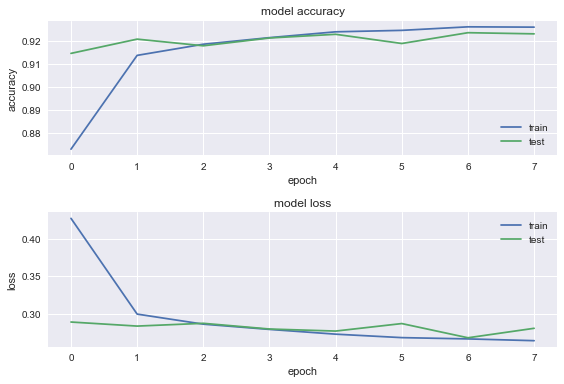

In [13]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(mnist_model.history['acc'])
plt.plot(mnist_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(mnist_model.history['loss'])
plt.plot(mnist_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
plt.show()

# MNIST with single Dense Layer --> Accuracy 0.9756 with 8 epoch

In [14]:
#(x_train2, y_train2), (x_test2, y_test2) = mnist.load_data()
model2=Sequential()
model2.add(Lambda(normalize,input_shape=(1,28,28)))
model2.add(Flatten())
model2.add(Dense(512,activation='relu'))
model2.add(Dense(10,activation='softmax'))
model2.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [15]:
mnist_model_Signle_Dense=model2.fit_generator(train_batch,epochs=8,validation_data=valid_batch,steps_per_epoch=len(train_batch),validation_steps=len(valid_batch))

Epoch 1/8
938/938 [==============================] - 9s 9ms/step - loss: 0.1968 - acc: 0.9403 - val_loss: 0.0963 - val_acc: 0.9700
Epoch 2/8
938/938 [==============================] - 8s 9ms/step - loss: 0.0819 - acc: 0.9740 - val_loss: 0.0843 - val_acc: 0.9735
Epoch 3/8
938/938 [==============================] - 7s 8ms/step - loss: 0.0560 - acc: 0.9820 - val_loss: 0.0760 - val_acc: 0.9768
Epoch 4/8
938/938 [==============================] - 8s 8ms/step - loss: 0.0427 - acc: 0.9857 - val_loss: 0.0792 - val_acc: 0.9786
Epoch 5/8
938/938 [==============================] - 8s 8ms/step - loss: 0.0323 - acc: 0.9895 - val_loss: 0.0727 - val_acc: 0.9788
Epoch 6/8
938/938 [==============================] - 8s 8ms/step - loss: 0.0296 - acc: 0.9903 - val_loss: 0.0869 - val_acc: 0.9780
Epoch 7/8
938/938 [==============================] - 8s 9ms/step - loss: 0.0258 - acc: 0.9916 - val_loss: 0.0830 - val_acc: 0.9800
Epoch 8/8
938/938 [==============================] - 9s 9ms/step - loss: 0.0215 - a

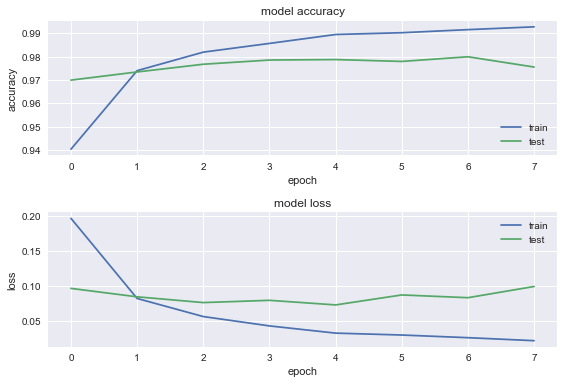

In [16]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(mnist_model_Signle_Dense.history['acc'])
plt.plot(mnist_model_Signle_Dense.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(mnist_model_Signle_Dense.history['loss'])
plt.plot(mnist_model_Signle_Dense.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
plt.show()

In [21]:
predicted_classes = model2.predict_classes(x_test1)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test1)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test1)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

10000/10000 [==============================] - 0s 48us/step

9756  classified correctly
244  classified incorrectly


In [23]:
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(x_test1[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test1[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(x_test1[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test1[incorrect]))
    plt.xticks([])
    plt.yticks([])


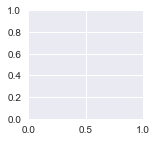

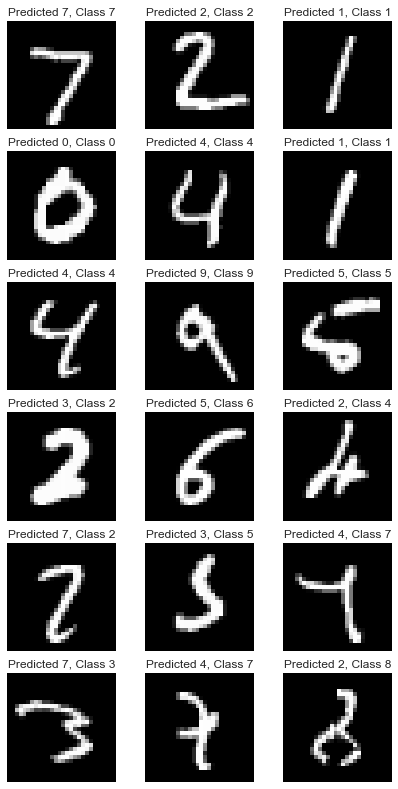

In [24]:
plt.show()